<font face="Times New Roman" size=5><div dir=rtl align=center>
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br> <br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Computer
</font>
<br> <br>
<font color="#008080" size=5>
Introduction to Machine Learning
</font>

<hr/> <br>
<font color="#800080" size=6>
Chapter 2: Decision Tree
<br>
</font>
<br>
<font face="Times New Roman" size=4>
:authors <br>
<b>HamidReza Yaqubi Araqi</b>
</font>
<hr>
</div></font>

<font  size=5><div dir=ltr>
<font face="Times New Roman" color="#008080" size=5>**Table of Contents**</font>
<br>

<font size=4>
<ul>
    <li>
        <a href="#1">
            1. Decision Tree (Classification)
        </a>
    </li>
    <li>
        <a href="#2">
            2. Decision Tree (Regression)
        </a>
    </li>
    <li>
        <a href="#3">
            3. From Scratch
        </a>
    </li>
</div>

<font face="Times New Roman"><div id="1">
# <font color="#800080" size=6>**1. Decision Tree (Classification)**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Introduction to Dataset </font>

<font face="Times New Roman" size=3> The dataset that we use in this section is for evaluating 1700 cars which was published in this <a href="">paper</a>. This dataset includes 7 columns that we will name them. you can have access to these data by this <a href="">link</a>.
<br>
<ol>
    <li>
        buying_price
    </li>
    <li>
        maintenance_cost
    </li>
    <li>
        number_of_doors
    </li>
    <li>
        number_of_persons
    </li>
    <li>
        lug_boot
    </li>
    <li>
        safety
    </li>
    <li>
        decision
    </li>
</ol>
</font>

##### <font color="#008080" face="Times New Roman" size=4> - Loading Dataset </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the raw data
car_evaluation_pdf = pd.read_csv("../Files/car_evaluation.csv", header=None)

# Our local dataset has no suitable column name so we should correct them
car_evaluation_column_names = ['buying_price', 'maintenance_cost', 'number_of_doors',
                               'number_of_persons', 'lug_boot', 'safety',
                               'decision']
car_evaluation_pdf.columns = car_evaluation_column_names

car_evaluation_pdf.head(3)

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


##### <font color="#008080" face="Times New Roman" size=4> - More Information About Dataset </font>

In [2]:
car_evaluation_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying_price       1728 non-null   object
 1   maintenance_cost   1728 non-null   object
 2   number_of_doors    1728 non-null   object
 3   number_of_persons  1728 non-null   object
 4   lug_boot           1728 non-null   object
 5   safety             1728 non-null   object
 6   decision           1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [3]:
car_evaluation_pdf.describe()

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [4]:
# Print the distribution of each column
for column in car_evaluation_column_names:
    print(car_evaluation_pdf[column].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying_price, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maintenance_cost, dtype: int64
2        432
3        432
4        432
5more    432
Name: number_of_doors, dtype: int64
2       576
4       576
more    576
Name: number_of_persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: decision, dtype: int64


##### <font color="#008080" face="Times New Roman" size=4> - Pre-Processing Dataset</font>

In [5]:
from sklearn.preprocessing import LabelEncoder

# Use encoder to transform non-integer values to integers
encoder = LabelEncoder()

encoded_car_evaluation_pdf = car_evaluation_pdf.copy()

for column in car_evaluation_pdf.columns[:-1]:
    encoded_car_evaluation_pdf[column] = encoder.fit_transform(car_evaluation_pdf[column])

encoded_car_evaluation_pdf.head(3)

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
0,3,3,0,0,2,1,unacc
1,3,3,0,0,2,2,unacc
2,3,3,0,0,2,0,unacc


In [6]:
from sklearn.model_selection import train_test_split

# Split input X and labels
X = encoded_car_evaluation_pdf.drop(['decision'], axis=1)
y = encoded_car_evaluation_pdf['decision']

# Split the data and labels for trainning and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [7]:
from sklearn.tree import DecisionTreeClassifier

clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [8]:
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Prediction</font>

In [9]:
y_pred = clf_entropy.predict(X_test)

##### <font color="#008080" face="Times New Roman" size=4> - Accuracy </font>

In [10]:
# Use two methodology to find the acc of a sklearn model
from sklearn.metrics import accuracy_score

model_accuracy_score = accuracy_score(y_test, y_pred)

print('Model accuracy score with criterion=entropy: {0:0.4f}'. format(model_accuracy_score))

print('Training set score: {:.4f}'.format(clf_entropy.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_entropy.score(X_test, y_test)))

Model accuracy score with criterion=entropy: 0.7653
Training set score: 0.7744
Test set score: 0.7653


#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

<font face="Times New Roman" size=3> To run the code of visualization section you need to install graphviz by executing this command
<br>
`sudo apt-get install graphviz`
</font>

In [11]:
!pip install graphviz

[Text(0.375, 0.875, 'x[3] <= 0.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 375\nvalue = [0, 0, 375, 0]'),
 Text(0.5, 0.625, 'x[5] <= 0.5\nentropy = 1.465\nsamples = 782\nvalue = [255, 49, 438, 40]'),
 Text(0.25, 0.375, 'x[1] <= 2.5\nentropy = 1.684\nsamples = 263\nvalue = [139, 21, 63, 40]'),
 Text(0.125, 0.125, 'entropy = 1.668\nsamples = 194\nvalue = [108, 21, 25, 40]'),
 Text(0.375, 0.125, 'entropy = 0.993\nsamples = 69\nvalue = [31, 0, 38, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\nentropy = 1.049\nsamples = 519\nvalue = [116, 28, 375, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 257\nvalue = [0, 0, 257, 0]'),
 Text(0.875, 0.125, 'entropy = 1.383\nsamples = 262\nvalue = [116, 28, 118, 0]')]

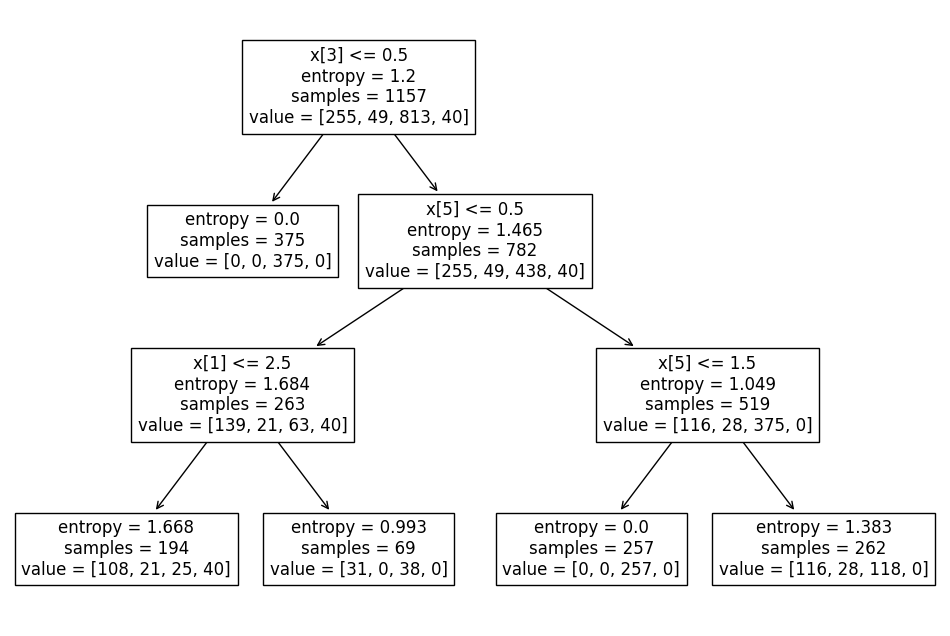

In [12]:
from sklearn import tree
import graphviz

plt.figure(figsize=(12,8))
tree.plot_tree(clf_entropy.fit(X_train, y_train))

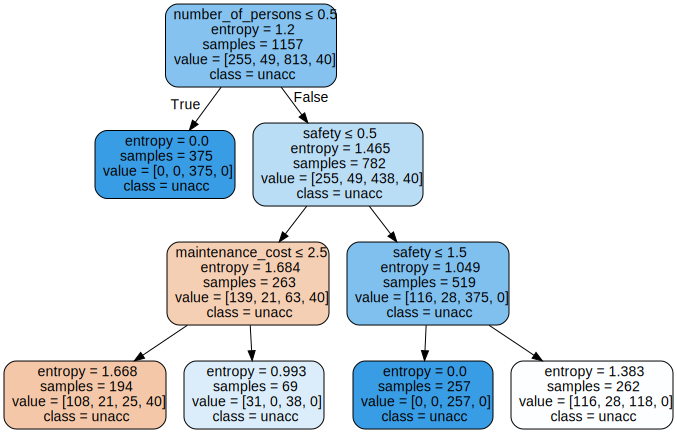

In [13]:
# export the decisoin tree
dot_data = tree.export_graphviz(clf_entropy, out_file=None,
                                feature_names=X_train.columns,
                                class_names=y_train,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)

graph

#### <font color="#008080" face="Times New Roman" size=4>**More Codes**</font>

In [14]:
# TODO: try decision tree with gini criterion again and graph the result.
# clf_gini =

<font face="Times New Roman"><div id="2">
# <font color="#800080" size=6>**2. Decision Tree (Regression)**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Introduction to Dataset </font>

<font face="Times New Roman" size=3>
In this dataset, the level of the scalable sound pressure or SSPL is measured for a variety of airfoil blades with different characteristics that are available in each column. This data set consists of frequency columns (f), angle of attack (alpha), chords length (c), free flow rate (U_infinity), thickness of suction side displacement (delta) and scale sound pressure level (SSPL). You can use this <a href="">link</a> to access the dataset.
</font>

##### <font color="#008080" face="Times New Roman" size=4> - Loading Dataset </font>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

airfoil_self_noise_pdf = pd.read_csv("../Files/AirfoilSelfNoise.csv")
airfoil_self_noise_pdf.head(3)

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951


##### <font color="#008080" face="Times New Roman" size=4> - More Information About Dataset </font>

In [16]:
airfoil_self_noise_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   f           1503 non-null   int64  
 1   alpha       1503 non-null   float64
 2   c           1503 non-null   float64
 3   U_infinity  1503 non-null   float64
 4   delta       1503 non-null   float64
 5   SSPL        1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [17]:
airfoil_self_noise_pdf.describe()

,f,alpha,c,U_infinity,delta,SSPL
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


##### <font color="#008080" face="Times New Roman" size=4> - Visualizing Dataset </font>

<ipython-input-18-4f0e5d470729>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  airfoil_self_noise_pdf.hist(ax=ax)


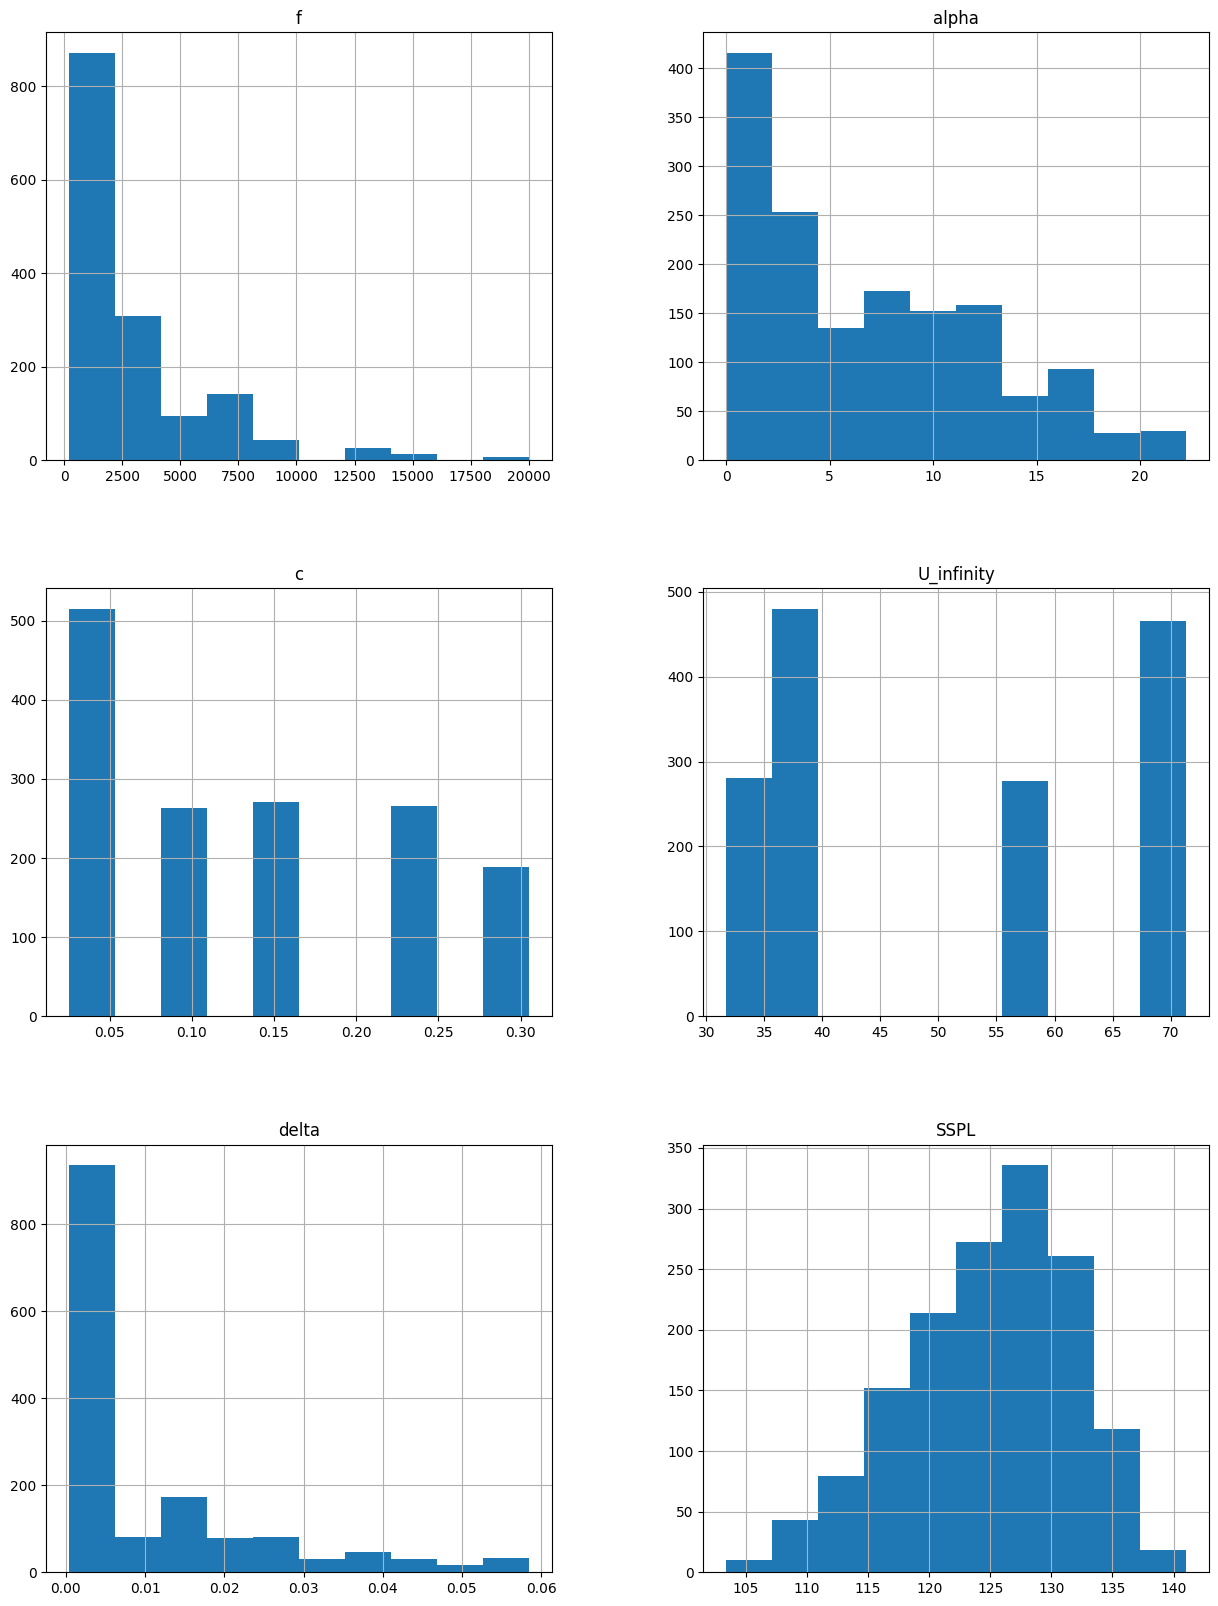

In [18]:
fig = plt.figure(figsize = (15, 20))
ax = fig.gca()
airfoil_self_noise_pdf.hist(ax=ax)
plt.show()

##### <font color="#008080" face="Times New Roman" size=4> - Pre-Processing Dataset</font>

In [19]:
from sklearn.model_selection import train_test_split

X = airfoil_self_noise_pdf.drop(['SSPL'], axis=1)
y = airfoil_self_noise_pdf['SSPL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [20]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=7, min_samples_split=5, random_state=0)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [21]:
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_split=5, random_state=0)

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Prediction</font>

In [22]:
y_pred = reg_tree.predict(X_test)

##### <font color="#008080" face="Times New Roman" size=4> - Accuracy</font>

In [23]:
from sklearn.metrics import r2_score

model_mean_squared_error = r2_score(y_test, y_pred)
print('Model r2_score score with criterion=entropy: {0:0.4f}'. format(model_mean_squared_error))

Model r2_score score with criterion=entropy: 0.7569


#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

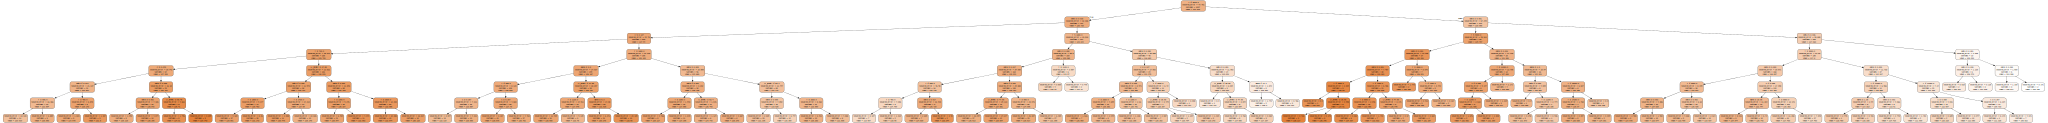

In [24]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(reg_tree, out_file=None,
                                feature_names=X_train.columns,
                                class_names=y_train,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)

graph

<font face="Times New Roman"><div id="3">
# <font color="#800080" size=6>**3. From Scratch**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Introduction to Dataset </font>

<font face="Times New Roman" size=3> For more information about the dataset of this section you can use this <a href="">link</a> </font>

##### <font color="#008080" face="Times New Roman" size=4> - Loading Dataset </font>

In [25]:
breast_cancer_pdf = pd.read_csv("../Files/breast_cancer.csv")
breast_cancer_pdf.head(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0
1,20.57,17.77,132.9,1326.0,0.08474,0
2,19.69,21.25,130.0,1203.0,0.10960,0


##### <font color="#008080" face="Times New Roman" size=4> - Pre-Processing Dataset</font>

In [26]:
X = breast_cancer_pdf.drop(['diagnosis'], axis=1)
y = breast_cancer_pdf[['diagnosis']]

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.70, random_state=42)

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [ ]:
# You should complete TODO tags
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from math import log
import random

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf(self):
        if self.value is not None:
            return True
        return False


class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def is_splitting_finished(self, depth, num_class_labels, num_samples):
        if depth == self.max_depth:
            return True

        if num_samples <= self.min_samples_split:
            return True

        if num_class_labels == 1:
            return True

        return False

    def split(self, X, y, feature, threshold):
        left_indexes = X[feature] <= threshold
        right_indexes = -left_indexes
        X_left = X[left_indexes]
        y_left = y[left_indexes]
        X_right = X[right_indexes]
        y_right = y[right_indexes]

        return X_left, X_right, y_left, y_right

    def entropy(self, y):
        p = len(y[y.diagnosis == 1]) / len(y)
        if p == 1 or p == 0:
            return 0
        return -p * log(p, 2) - (1 - p) * log(1 - p, 2)


    def information_gain(self, X, y, feature, threshold):
        X_left, X_right, y_left, y_right = self.split(X, y, feature, threshold)
        H_y = self.entropy(y)
        p = len(X[X[feature] >= threshold]) / len(X)
        if len(y_left) != 0:
            # TODO
        else:
            # TODO
        if len(y_right) != 0:
            # TODO
        else:
            # TODO
        H_y_given_x = None # TODO
        return H_y - H_y_given_x

    def best_split(self, X, y):
        features = list(X.columns.values)
        random.shuffle(features)
        best_information_gain = 0
        best_feature = None
        best_threshold = None
        for feature in features:
            thresholds = list(set(list(X[feature])))
            for threshold in thresholds:
                info_gain = self.information_gain(X, y, feature, threshold)
                if info_gain >= best_information_gain:
                    best_information_gain = info_gain
                    best_feature = feature
                    best_threshold = threshold
        return best_feature, best_threshold

    def build_tree(self, X, y, depth=0):
        if self.is_splitting_finished(depth, len(X.columns), len(X)):
            return None

        best_feature, best_threshold = self.best_split(X, y)
        X_left, X_right, y_left, y_right = self.split(X, y, best_feature, best_threshold)

        left_node = self.build_tree(X_left, y_left, depth=depth + 1)
        right_node = self.build_tree(X_right, y_right, depth=depth + 1)

        value = None
        if left_node is None or right_node is None:
            true_value = len(y[y['diagnosis'] == 1])
            false_value = len(y[y['diagnosis'] == 0])
            if true_value >= false_value:
                value = 1
            else:
                value = 0

        return Node(feature=best_feature, threshold=best_threshold, left=left_node, right=right_node, value=value)

    def fit(self, X, y):
        self.root = self.build_tree(X, y)

    def predict(self, X):
        tree = self.root
        predicted_value = []
        for index in list(X.index):
            data = X.loc[index]
            current_tree = tree
            for depth in range(self.max_depth):
                if Node.is_leaf(current_tree):
                    predicted_value.append(current_tree.value)
                    break
                feature = current_tree.feature
                threshold = current_tree.threshold
                if data[feature] <= threshold:
                    current_tree = current_tree.left
                if data[feature] > threshold:
                    current_tree = current_tree.right

        return predicted_value

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

In [ ]:
# set different values as hyperparameters and check the result
max_depths = # TODO
min_samples_splits = # TODO

In [ ]:
best_max_depth = None
best_min_samples_split = None
best_accuracy = 0
best_model = None
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        clf = DecisionTree(max_depth, min_samples_split)
        clf.fit(x_train, y_train)
        y_val_pred = clf.predict(x_val)
        y_train_pred = clf.predict(x_train)
        accuracy = accuracy_score(y_val_pred, y_val)
        train_accuracy = accuracy_score(y_train_pred, y_train)
        print(f"accuracy of training set for min_samples_splits={min_samples_split}-max_depths={max_depth} ={train_accuracy}")
        print(f"accuracy of validation set for min_samples_splits={min_samples_split}-max_depths={max_depth} ={accuracy}")
        print("------------------------------------------------")
        if accuracy >= best_accuracy:
            best_accuracy = accuracy
            best_max_depth = max_depth
            best_min_samples_split = min_samples_split
            best_model = clf